In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import ast
from matplotlib import pyplot as plt
import seaborn as sns


dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_fr = df[(df["job_country"] == "France")].dropna(subset=["salary_year_avg"])

In [3]:
job_titles = df_fr["job_title_short"].value_counts().index[:6].tolist()
job_titles

['Data Engineer',
 'Data Scientist',
 'Data Analyst',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [4]:
df_fr_top6 = df_fr[df_fr["job_title_short"].isin(job_titles)]

In [5]:
job_order = df_fr_top6.groupby("job_title_short")["salary_year_avg"].median().sort_values(ascending=False).index

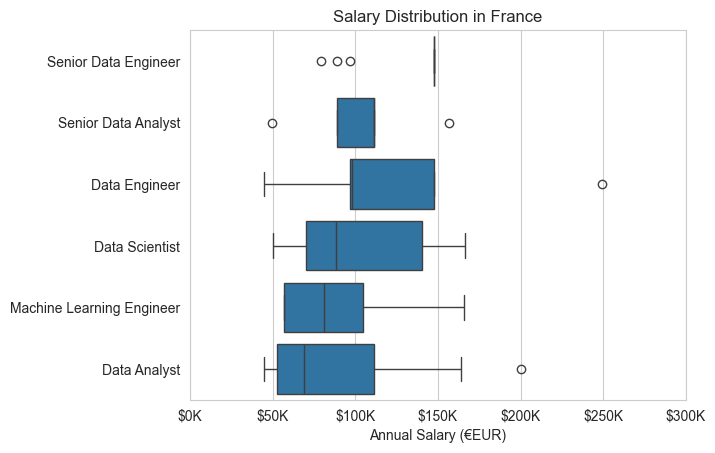

In [6]:
sns.boxplot(data=df_fr_top6, x="salary_year_avg", y="job_title_short", order=job_order)
sns.set_theme(style="ticks")

plt.title("Salary Distribution in France")
plt.xlabel("Annual Salary (€EUR)")
plt.ylabel("")
plt.xlim(0,300000)
ticks_x = plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}K")
ax = plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [7]:
# Median Salary for Data Analysts

In [8]:
df_da_fr = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "France")].copy()

In [9]:
df_da_fr = df_da_fr.dropna(subset=["salary_year_avg"])

In [10]:
df_da_fr = df_da_fr.explode("job_skills")
df_da_fr[["salary_year_avg","job_skills"]].head(5)

,salary_year_avg,job_skills
12526,111175.0,power bi
12526,111175.0,sharepoint
12526,111175.0,excel
33317,56700.0,scala
33317,56700.0,sql


In [11]:
da_fr_top_pay = df_da_fr.groupby("job_skills")["salary_year_avg"].agg(["count","median"]).sort_values(by="median",ascending=False)
da_fr_top_pay = da_fr_top_pay.head(10)

In [12]:
da_fr_skills = df_da_fr.groupby("job_skills")["salary_year_avg"].agg(["count","median"]).sort_values(by='count',ascending=False)
da_fr_skills = da_fr_skills.head(10).sort_values(by="median",ascending=False)

da_fr_skills

,count,median
job_skills,,
excel,8,96012.5
python,20,94800.0
power bi,8,92925.0
sql,28,89100.0
aws,5,89100.0
snowflake,5,89100.0
azure,9,80850.0
spark,5,80850.0
airflow,5,57500.0


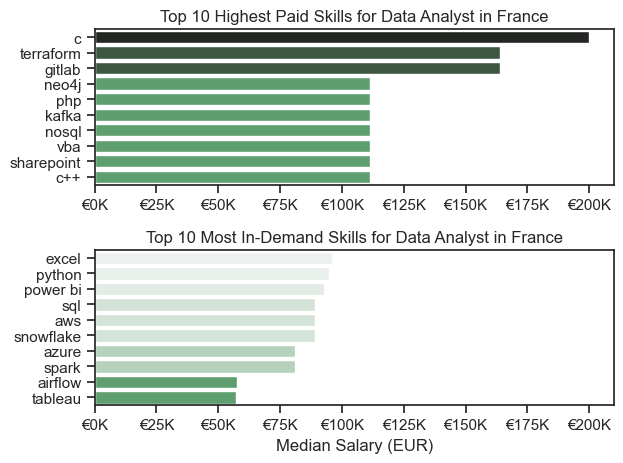

In [14]:
fig, ax = plt.subplots(2,1)

sns.set_theme(style="ticks")
sns.barplot(data=da_fr_top_pay,x="median",y=da_fr_top_pay.index,ax=ax[0], hue="median",palette="dark:g_r")

ax[0].legend().remove()
# df_da_fr_top_pay[::-1].plot(kind="barh", y="median", ax=ax[0], legend=False)
ax[0].set_title("Top 10 Highest Paid Skills for Data Analyst in France")
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"€{int(y/1000)}K"))

sns.barplot(data=da_fr_skills, x="median",y=da_fr_skills.index,ax=ax[1], hue="median",palette="light:g_r")
ax[1].legend().remove()
# df_da_fr_skills[::-1].plot(kind="barh",y="median",ax=ax[1], legend=False)
ax[1].set_title("Top 10 Most In-Demand Skills for Data Analyst in France")
ax[1].set_ylabel("")
ax[1].set_xlabel("Median Salary (EUR)")
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"€{int(y/1000)}K"))

fig.tight_layout()
plt.show()